In [1]:
import xarray as xr
import numpy as np
import pyproj as proj
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib as mpl
import matplotlib.ticker as mticker
import time
import cartopy.crs as ccrs
import cartopy as cr
import cartopy.feature as cfeature
import os
import copy as cp
import matplotlib.colors as colors

# Load all 3 configs 

In [2]:
NTEST = 'k-cosine-w-cos_30noresamp'
path_save = '/storage/mathilde/MainProject/1_ExternalProcesses/LagrangianTracking/Clustering/Last_Version/config_k-cosine-w-cos_30noresampnoresamp_goodw/'
path_save_analysis = path_save
path_save_clust = path_save
path_figs = path_save+'Figs/'

In [3]:
CENTROID = np.load(path_save+'centroids'+NTEST+'.npy', allow_pickle = True)
LABELS_TEST = np.load(path_save+'labels_test'+NTEST+'.npy', allow_pickle = True)
X_REDUCED_TEST = np.load(path_save+'X_reduced_test'+NTEST+'.npy', allow_pickle = True)
LATS_TEST = np.load(path_save+'lats_test'+NTEST+'.npy', allow_pickle = True)
LONS_TEST = np.load(path_save+'lons_test'+NTEST+'.npy', allow_pickle = True)
LATS_TRAIN = np.load(path_save+'lats_train'+NTEST+'.npy', allow_pickle = True)
LONS_TRAIN = np.load(path_save+'lons_train'+NTEST+'.npy', allow_pickle = True)
LABELS_VALID = np.load(path_save+'labels_valid'+NTEST+'.npy', allow_pickle = True)
X_REDUCED_VALID = np.load(path_save+'X_reduced_valid'+NTEST+'.npy', allow_pickle = True)
LATS_VALID = np.load(path_save+'lats_valid'+NTEST+'.npy', allow_pickle = True)
LONS_VALID = np.load(path_save+'lons_valid'+NTEST+'.npy', allow_pickle = True)
TEMPS_VALID = np.load(path_save+'temps_valid'+NTEST+'.npy', allow_pickle = True)
SALS_VALID = np.load(path_save+'sals_valid'+NTEST+'.npy', allow_pickle = True)
TEMPS_TEST = np.load(path_save+'temps_test'+NTEST+'.npy', allow_pickle = True)
SALS_TEST = np.load(path_save+'sals_test'+NTEST+'.npy', allow_pickle = True)
TEMPS_TRAIN = np.load(path_save+'temps_train'+NTEST+'.npy', allow_pickle = True)
SALS_TRAIN = np.load(path_save+'sals_train'+NTEST+'.npy', allow_pickle = True)

# Analysis of clusters

In [6]:
# Load bathymetry
bathy = xr.open_dataset('/storage3/shared/Glorys12/GLO-MFC_001_030_mask_bathy.nc')
latb = bathy.latitude ; lonb = bathy.longitude
bathy = bathy.deptho

In [9]:
Col = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:cyan']

L1 = [1,3,6,7,8,9,10,18,19,23,27,29] # Retro
L2 = [21] # Slope Sea avant retro
L3 = [2,17,21,22,25] # Slope Sea
L4 = [26] # Labrador Sea
L5 = [0,4,5,12,13,14,15,16,20] # Labrador Shelf
L6 = [11,28] # South
L7 = [24] # Belle Isle

Groupes = [L1,L2,L3,L4,L5,L6,L7]
Names = ['Retroflected', 'Westward, then retro', 'Westward-flowing', 'Labrador Sea', 'Labrador Shelf', 'Southward-flowing', 'Belle Isle']
Col = ['tab:red', 'tab:green', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:cyan']


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


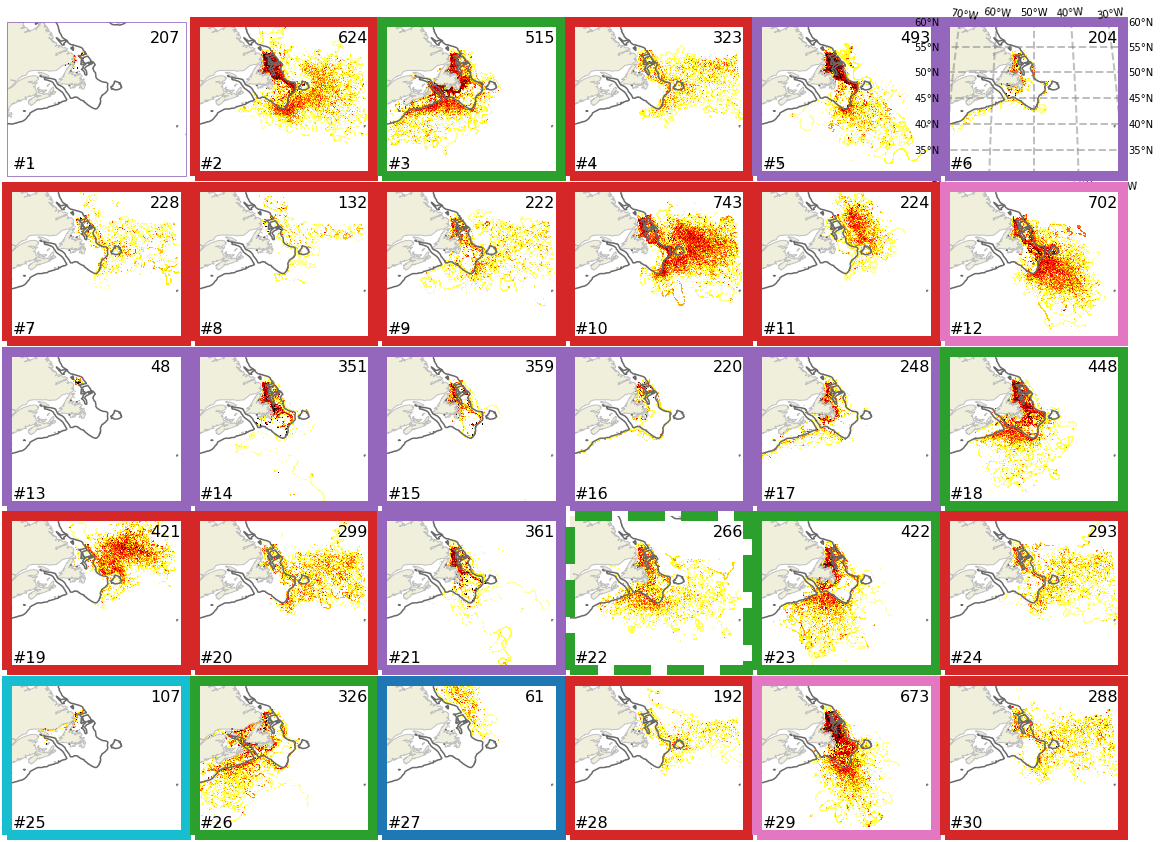

In [9]:
# Density plots of all
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ncs = range(30)

f = plt.figure(figsize = (20, 15))   

for nc in ncs:
    print(nc)
    
    # color of frame
    if nc in L1:
        cf = Col[0]
    elif nc in L2:
        cf = Col[1]
    elif nc in L3:
        cf = Col[2]
    elif nc in L4: 
        cf = Col[3]
    elif nc in L5:
        cf = Col[4]
    elif nc in L6:
        cf = Col[5]
    elif nc in L7:
        cf = Col[6]
    else:
        cf = 'k'
            
    lons_pdf = [] ; lats_pdf = [] ; count=0
    for n in range(len(LABELS_TEST)):
        if LABELS_TEST[n]==nc :
            lons_pdf.extend(LONS_TEST[n,:][~np.isnan(LONS_TEST[n,:])]) ; lats_pdf.extend(LATS_TEST[n,:][~np.isnan(LATS_TEST[n,:])])
            count += 1
                
    # Initalize the histogram
    lon1 = -70 ; lon2 = -20 ; lat1 = 30 ; lat2 = 65
    x = np.arange(lon1,lon2,1./12.)
    y = np.arange(lat1,lat2,1./12.)
    
    # Calculate the histogram
    hist, xe, ye = np.histogram2d(lons_pdf, lats_pdf, bins=(x,y))
    hist[hist==0] = np.nan
    
    # plot
    ax = f.add_subplot(5,6,nc+1, projection = ccrs.Robinson(central_longitude=-50))
    ax.coastlines(color='silver')
    #gl = ax.gridlines(zorder=-1)
    #    if nc == 5:
    #    gl = ax.gridlines(draw_labels=True, zorder=-1)
    #    gl.xlabels_bottom = False 
    #    gl.rotate_labels = False
    #    gl.top_labels = gl.left_labels = False
    ax.set_extent([-70, -30, 30, 60],  crs=ccrs.PlateCarree())
    ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')

    im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=100), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
    ##im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=np.nanpercentile(hist,99)), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
  
    ax.text(0.03, 0.05, '#'+str(nc+1), transform=ax.transAxes, fontsize=16)
    ax.text(0.8, 0.87, str(count), transform=ax.transAxes, fontsize=16)
    plt.contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)
    
    if nc == 5:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
      
    # change frame color depending on super-clusters
    for spine in ax.spines.values():
        spine.set_edgecolor(cf)
        if nc in L2:
            spine.set_linestyle("dashed")
    mpl.rcParams['axes.linewidth'] = 10 #set the value globally
    
    #if nc==0:
    #    cbaxes = inset_axes(ax, width="50%", height="10%", loc=3) 
    #    cbar = plt.colorbar(im, cax=cbaxes, ticks=[0.,10,100], orientation='horizontal')
        
plt.subplots_adjust(hspace=0.05, wspace=0.05)
        
##plt.savefig(path_figs+'Details/clusters_all_density_diffcbar.png', dpi=300)
plt.savefig(path_figs+'clusters_all_density.png', dpi=300)
plt.show()
plt.close()


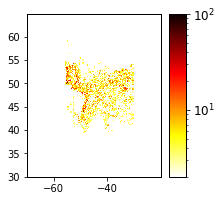

In [15]:
# plot colorbar separately
f = plt.figure(figsize=(3,3))   
mpl.rcParams['axes.linewidth'] = 1
im = plt.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=100), cmap=get_cmap('hot_r'))
cbar = plt.colorbar(im, ticks=[0.,10,100], orientation='vertical', aspect=10)
cbar.ax.tick_params(labelsize=12)

plt.savefig(path_figs+'cbar.png',dpi=300)
plt.show()
plt.close()

0
plot
2
plot
3
plot
4
plot
5
plot
6
plot


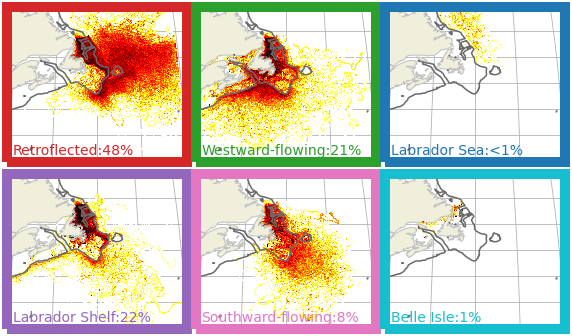

In [12]:
# Density plot by category

# Density plots of all
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ncs = range(len(Groupes))
perc = ['48', '1', '21', '<1', '22', '8', '1']
Names = ['Retroflected', 'Westward, then retro', 'Westward-flowing', 'Labrador Sea', 'Labrador Shelf', 'Southward-flowing', 'Belle Isle']

mpl.rcParams['axes.linewidth'] = 10 #set the value globally

f = plt.figure(figsize = (10, 6))   

ncsl = [0,2,3,4,5,6]
for nc in ncsl:
    print(nc)
    
    lons_pdf = [] ; lats_pdf = [] ; count=0
    for n in range(len(LABELS_TEST)):
        if LABELS_TEST[n] in Groupes[nc] :
            lons_pdf.extend(LONS_TEST[n,:][~np.isnan(LONS_TEST[n,:])]) ; lats_pdf.extend(LATS_TEST[n,:][~np.isnan(LATS_TEST[n,:])])
            count += 1
                
    # Initalize the histogram
    lon1 = -70 ; lon2 = -20 ; lat1 = 30 ; lat2 = 65
    x = np.arange(lon1,lon2,1./12.)
    y = np.arange(lat1,lat2,1./12.)
    
    # Calculate the histogram
    hist, xe, ye = np.histogram2d(lons_pdf, lats_pdf, bins=(x,y))
    hist[hist==0] = np.nan
    
    print('plot')
    # plot
    if nc == 0 :
        num = nc+1
    else:
        num = nc
    ax = f.add_subplot(2,3,num, projection = ccrs.Robinson(central_longitude=-50))
    ax.coastlines(color='silver')
    ax.gridlines(zorder=-1)
    ax.set_extent([-70, -30, 30, 60],  crs=ccrs.PlateCarree())
    ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')

    im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=200), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
    ##im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=np.nanpercentile(hist,99)), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
  
    # change frame color 
    for spine in ax.spines.values():
        spine.set_edgecolor(Col[nc])

    ax.text(0.03, 0.05, Names[nc]+':'+perc[nc]+'%', transform=ax.transAxes, fontsize=14, color=Col[nc])
    plt.contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)
        
plt.subplots_adjust(hspace=0.05, wspace=0.05)
        
plt.savefig(path_figs+'categories_density.png', dpi=300)
plt.show()
plt.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


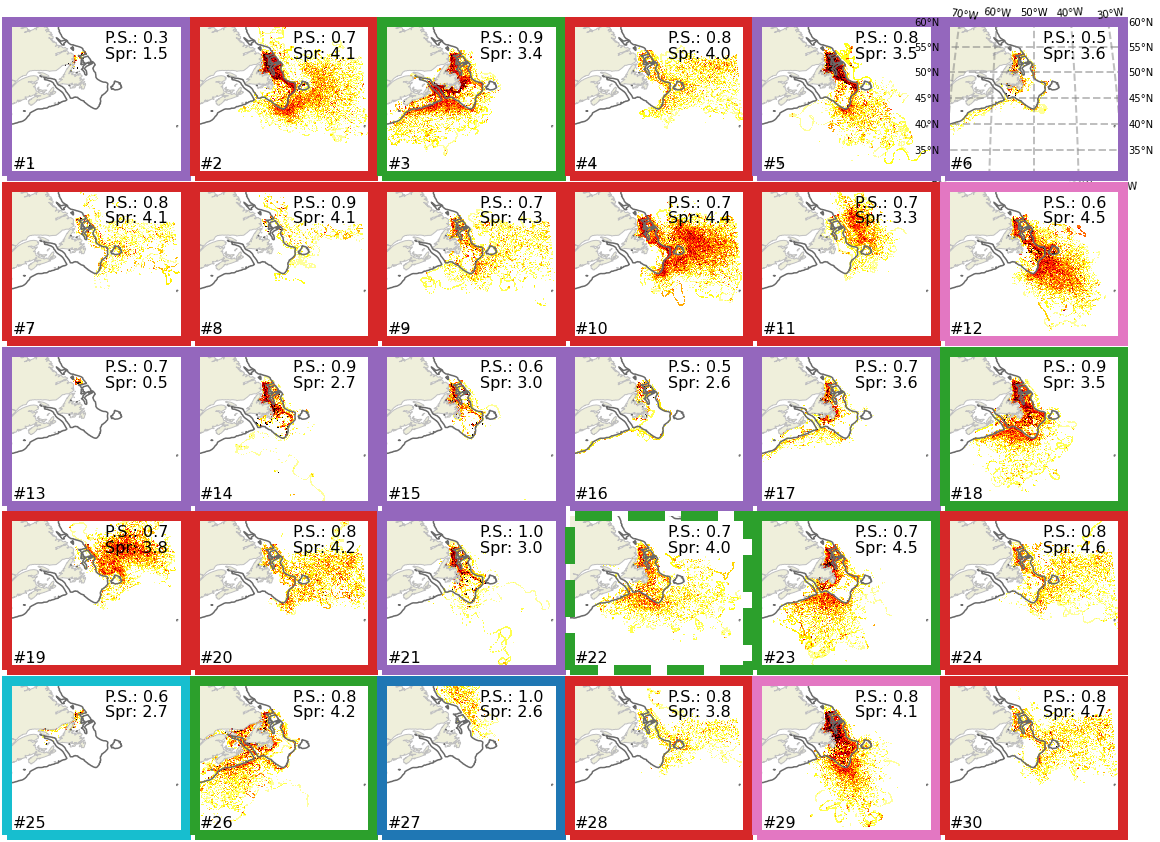

In [15]:
# plot with the uncertainty scores
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ncs = range(30)
# load the uncertainties
pscore = np.genfromtxt('physical_score_clusters.txt', delimiter=',')
spread = np.genfromtxt('spread_clusters.txt', delimiter=',')

f = plt.figure(figsize = (20, 15))   

for nc in ncs:
    print(nc)
    
    # color of frame
    if nc in L1:
        cf = Col[0]
    elif nc in L2:
        cf = Col[1]
    elif nc in L3:
        cf = Col[2]
    elif nc in L4: 
        cf = Col[3]
    elif nc in L5:
        cf = Col[4]
    elif nc in L6:
        cf = Col[5]
    elif nc in L7:
        cf = Col[6]
    else:
        cf = 'k'
            
    lons_pdf = [] ; lats_pdf = [] ; count=0
    for n in range(len(LABELS_TEST)):
        if LABELS_TEST[n]==nc :
            lons_pdf.extend(LONS_TEST[n,:][~np.isnan(LONS_TEST[n,:])]) ; lats_pdf.extend(LATS_TEST[n,:][~np.isnan(LATS_TEST[n,:])])
            count += 1
                
    # Initalize the histogram
    lon1 = -70 ; lon2 = -20 ; lat1 = 30 ; lat2 = 65
    x = np.arange(lon1,lon2,1./12.)
    y = np.arange(lat1,lat2,1./12.)
    
    # Calculate the histogram
    hist, xe, ye = np.histogram2d(lons_pdf, lats_pdf, bins=(x,y))
    hist[hist==0] = np.nan
    
    # plot
    ax = f.add_subplot(5,6,nc+1, projection = ccrs.Robinson(central_longitude=-50))
    ax.coastlines(color='silver')
    #gl = ax.gridlines(zorder=-1)
    #    if nc == 5:
    #    gl = ax.gridlines(draw_labels=True, zorder=-1)
    #    gl.xlabels_bottom = False 
    #    gl.rotate_labels = False
    #    gl.top_labels = gl.left_labels = False
    ax.set_extent([-70, -30, 30, 60],  crs=ccrs.PlateCarree())
    ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')

    im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=100), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
    ##im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=np.nanpercentile(hist,99)), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
  
    ax.text(0.03, 0.05, '#'+str(nc+1), transform=ax.transAxes, fontsize=16)
    ax.text(0.55, 0.87, 'P.S.: %.1f'%pscore[nc], transform=ax.transAxes, fontsize=16)
    ax.text(0.55, 0.77, 'Spr: %.1f'%spread[nc], transform=ax.transAxes, fontsize=16)
    plt.contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)
    
    if nc == 5:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
      
    # change frame color depending on super-clusters
    for spine in ax.spines.values():
        spine.set_edgecolor(cf)
        if nc in L2:
            spine.set_linestyle("dashed")
    mpl.rcParams['axes.linewidth'] = 10 #set the value globally
    
    #if nc==0:
    #    cbaxes = inset_axes(ax, width="50%", height="10%", loc=3) 
    #    cbar = plt.colorbar(im, cax=cbaxes, ticks=[0.,10,100], orientation='horizontal')
        
plt.subplots_adjust(hspace=0.05, wspace=0.05)
        
plt.savefig(path_figs+'clusters_uncertainty.png', dpi=300)
plt.show()
plt.close()
